In [1]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [5]:
(X_train,y_train),(X_test,y_test)=load_data()

In [8]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [9]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

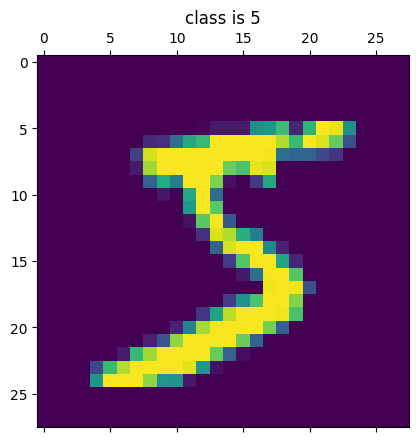

In [12]:
import matplotlib.pyplot as plt
plt.matshow(X_train[0])
plt.title(f"class is {y_train[0]}")
plt.show()

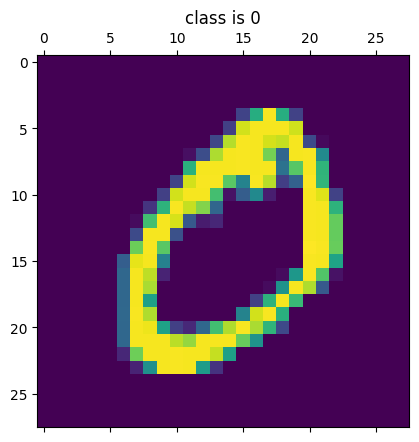

In [13]:
plt.matshow(X_train[1])
plt.title(f"class is {y_train[1]}")
plt.show()

In [14]:
# preprocessing:
import numpy as np
np.max(X_train),np.min(X_train)

(np.uint8(255), np.uint8(0))

In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:
np.max(X_train),np.min(X_train)

(np.float64(1.0), np.float64(0.0))

In [17]:
np.max(X_test),np.min(X_test)

(np.float64(1.0), np.float64(0.0))

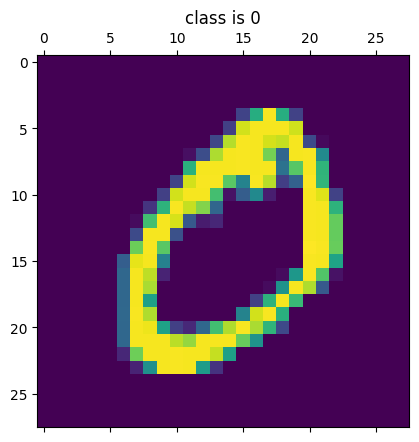

In [18]:
plt.matshow(X_train[1])
plt.title(f"class is {y_train[1]}")
plt.show()

In [19]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [21]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [23]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [24]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,),name='h1'))
model.add(Dense(128,activation='relu',name='h2'))
model.add(Dense(10,activation='softmax',name='o'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ o (Dense)                       │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(x=X_train,y=y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8975 - loss: 0.3508 - val_accuracy: 0.9695 - val_loss: 0.1013
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9724 - loss: 0.0953 - val_accuracy: 0.9755 - val_loss: 0.0845
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9814 - loss: 0.0629 - val_accuracy: 0.9754 - val_loss: 0.0883
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9854 - loss: 0.0498 - val_accuracy: 0.9767 - val_loss: 0.0918
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9893 - loss: 0.0387 - val_accuracy: 0.9794 - val_loss: 0.0860
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9790 - val_loss: 0.0968
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9792 - val_loss: 0.0988
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9941 - loss: 0

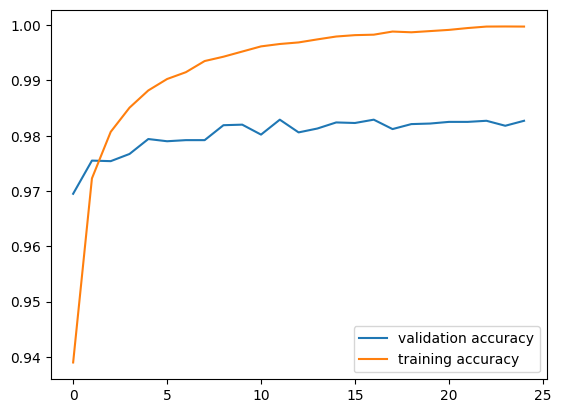

In [27]:
h=history.history
plt.plot(h['val_accuracy'],label='validation accuracy')
plt.plot(h['accuracy'],label='training accuracy')
plt.legend()
plt.show()

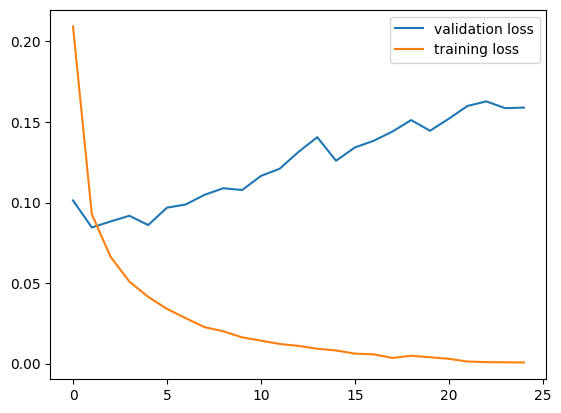

In [28]:
plt.plot(h['val_loss'],label='validation loss')
plt.plot(h['loss'],label='training loss')
plt.legend()
plt.show()

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9788 - loss: 0.1987


[0.15893425047397614, 0.982699990272522]